In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
from training.train import Stylizer
from training.l_bfgs import L_BFGS
from training.util.build_callback import build_callback
from training.util.img_util import load_image

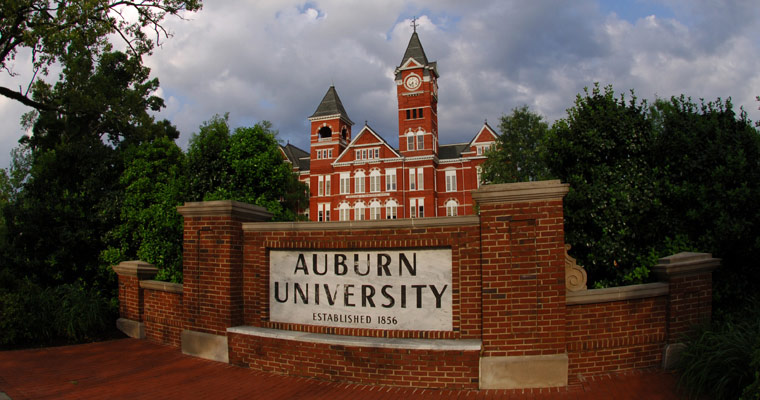

In [6]:
# the shape to load content, style, and ouptut as (w, h)
# None implies the size of the content will be used
image_size = None
# the location of the base content image
content_path = 'images/content/samford-sign.jpg'
# load and view the image with its dimensions
load_image(content_path, image_size)

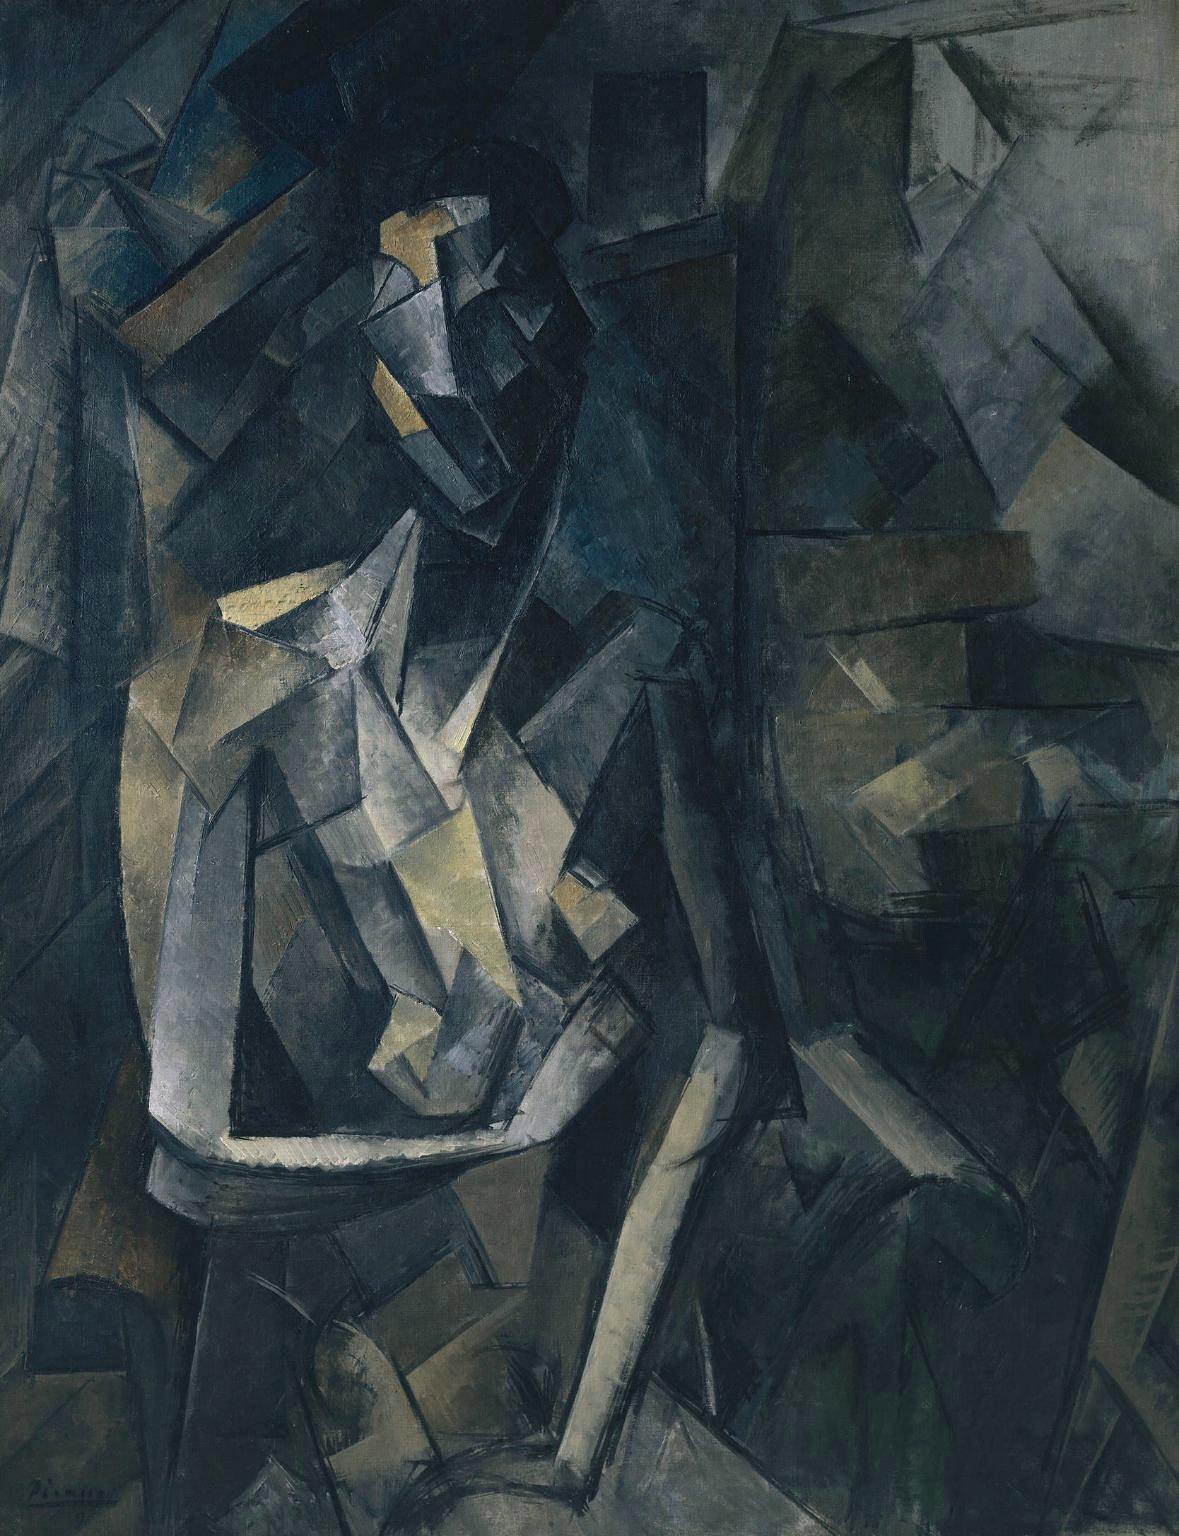

In [8]:
# the location of the base style image
style_path = 'images/styles/seated-nude.jpg'
# load and view the image with its dimensions
load_image(style_path, image_size)

In [9]:
!mkdir -p tex/img/loss

In [10]:
def stylize(optimizer, iterations: int):
    """
    Stylize the image.
    
    Args:
        optimizer: the optimizer method to use
        iterations: the number of iterations to optimize
        
    Returns: a stylized image
    """
    # create a stylization algorithm
    sty = Stylizer(content_weight=1, style_weight=1e4)
    # create directories for build artifacts
    build_dir = 'output/{}'.format(optimizer.__class__.__name__)
    # run the stlization algorithm and store the result
    img = sty(
        content_path=content_path,
        style_path=style_path,
        optimize=optimizer,
        iterations=iterations,
        image_size=image_size,
        callback=build_callback(build_dir)
    )
    # save the image to the tex directory
    tex_out = 'tex/img/loss/{}.png'.format(optimizer.__class__.__name__)
    img.save(tex_out)

In [11]:
max_evaluations = 300

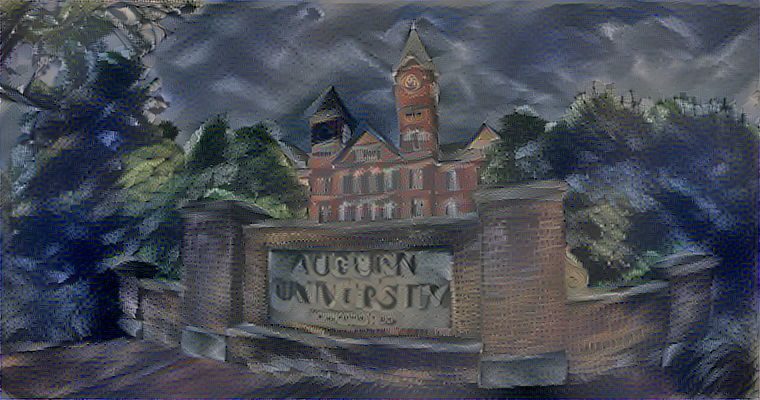

100%|██████████| 15/15 [03:16<00:00, 12.96s/it]


In [12]:
# L-BFGS has its own maximum evaluation
# per iteration setting
lbfgs = L_BFGS(max_evaluations=20)
stylize(lbfgs, int(max_evaluations / 20))

# Comparing Loss Optimization

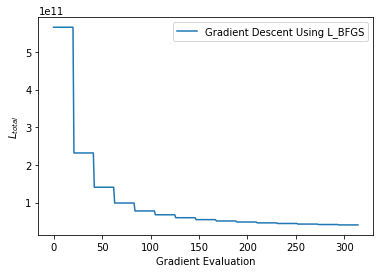

In [13]:
#plt.plot(gd.loss_history)
plt.plot(lbfgs.loss_history)
#plt.plot(adam.loss_history)
plt.legend(['Gradient Descent Using L_BFGS'])
plt.ylabel('$L_{total}$')
plt.xlabel('Gradient Evaluation')
plt.savefig('tex/img/loss/loss_plotting.png')